In [ ]:
#NOTEBOOK FOR LINEAR REGRESSION

In [311]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [101]:
#call in final movie csv

df=pd.read_csv('final_data.csv')

In [102]:
df.head()

,Title,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Rel_Date,Runtime,Genre,Rating,Rel_Month,Profit,log_opening,log_budget,log_intern,log_profit
0,Star Wars: Episode VII - The Force Awakens (2015),936.662225,1131.561399,2068.223624,247.966675,245.0,"December 16, 2015\n (EMEA, APAC)",2 hr 18 min,Action\n \n Adventure\n \n ...,PG-13,December,688.695550,5.513294,5.501258,7.031354,6.534799
1,Avengers: Endgame (2019),858.373000,1939.427564,2797.800564,357.115007,356.0,"April 24, 2019\n (22 markets)",3 hr 1 min,Action\n \n Adventure\n \n ...,PG-13,April,501.257993,5.878058,5.874931,7.570148,6.217121
2,Avatar (2009),760.507625,2029.931375,2790.439000,77.025481,237.0,"December 16, 2009\n (EMEA, LATAM)",2 hr 42 min,Action\n \n Adventure\n \n ...,PG-13,December,683.482144,4.344136,5.468060,7.615757,6.527201
3,Titanic (1997),659.363944,1535.075598,2194.439542,28.638131,200.0,"December 18, 1997\n (APAC)",3 hr 14 min,Drama\n \n Romance,PG-13,December,630.725813,3.354739,5.298317,7.336335,6.446871
4,Jurassic World (2015),652.270625,1018.130012,1670.400637,208.806270,150.0,"June 10, 2015\n (9 markets)",2 hr 4 min,Action\n \n Adventure\n \n ...,PG-13,June,443.464355,5.341407,5.010635,6.925723,6.094617


In [126]:
#STATSMODELS ANALYSIS-
#includes an intercept 
lml = smf.ols('Profit ~ Int_Gross_mil + Opening_mil + Budget_mil', data=df)
fit = lml.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     258.6
Date:                Wed, 15 Apr 2020   Prob (F-statistic):          1.23e-111
Time:                        19:11:21   Log-Likelihood:                -3666.7
No. Observations:                 678   AIC:                             7341.
Df Residuals:                     674   BIC:                             7359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        82.9929      3.910     21.224      0.000      75.315      90.671
Int_Gross_mil     0.2686      0.014     19.759      0.000       0.242       0.295
Opening_mil       0.3382      0.081      4.182      0.000       0.179       0.497
Budget_mil       -0.3278      0.046     -7.155      0.000      -0.418      -0.238
==============================================================================
Omnibus:                      188.258   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.196
Skew:                           1.248   Prob(JB):                    5.53e-158
Kurtosis:                       7.405   Cond. No.                         670.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#^^P-values look okay, R-squared and adjusted R-squared are close

In [284]:
#TRAIN_TEST_SPLIT (80/20)

#CREATE TRAIN/TEST/VALIDATION SETS
#set X and y as datasets
X = df.loc[:,['Int_Gross_mil','Budget_mil','Opening_mil']]
y = df['Profit']

#Split data into two sections: Train+Val, Testing 
#results in 20 test, 80 training
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20) 


In [285]:
#CROSS VALIDATION LINEAR REGRESSION ON TRAINING DATA
#don't need standard scaler here bc regular linear regression

kf = KFold(n_splits=5, shuffle=True, random_state = 71)

#Create an empty model
#regular cross validation 
lm_cv = LinearRegression()

#fit model
lm_cv.fit(X, y)

#all five values
print(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2')))

[0.6151717  0.24974637 0.56401701 0.43437895 0.40080921]
0.45282464657858706


In [302]:
#CROSS VALIDATION RIDGE REGRESSION AND LASSO NEED STANDARD SCALER 
std = StandardScaler()
std.fit(X.values)

X_scaled = std.transform(X.values)
X_test_scaled = std.transform(X_test.values)

In [296]:
#determine best alpha
rm_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

new_ridge=rm_cv.fit(X_scaled, y)
best_alpha = new_ridge.alpha_

print(best_alpha)

0.1


In [309]:
#Ridge CV Regression
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
RidgeCV = Ridge(alpha=0.1)

#fit model
RidgeCV.fit(X_scaled, y)

#results from ridge reg cross val
#all five values
print(cross_val_score(RidgeCV, X_scaled, y, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(RidgeCV, X_scaled, y, cv=kf, scoring='r2')))

[0.61504816 0.24984435 0.563994   0.43452803 0.40090582]
0.45286407294481557


In [312]:
#determine best alpha
ls_cv = LassoCV(alphas=[0.1, 1.0, 10.0])

new_lasso=ls_cv.fit(X_scaled, y)
best_alpha = new_lasso.alpha_

print(best_alpha)

0.1


In [313]:
#Lasso CV Regresion 
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
LassoCV = Lasso(alpha=0.1)

#fit model
LassoCV.fit(X_scaled, y)

#results from ridge reg cross val
#all five values
print(cross_val_score(LassoCV, X_scaled, y, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(LassoCV, X_scaled, y, cv=kf, scoring='r2')))

[0.61397122 0.2511362  0.56348413 0.43523738 0.40175234]
0.4531162541976971


In [ ]:
#RUN SAME MODELS WITH LOG TRANSFORMED VALUES

In [303]:
#RUN SAME MODELS WITH LOG TRANSFORMED VALUES
#CREATE TRAIN/TEST/VALIDATION SETS
#set X_log and y_log as datasets
X_log = df.loc[:,['log_intern','log_budget','log_opening']]
y_log = df['log_profit']

#Split data into two sections: Train+Val, Testing 
#results in 20 test, 80 training
X_log, X_log_test, y_log, y_log_test = train_test_split(X_log, y_log, test_size=.2, random_state=20) 

In [314]:
#CROSS VALIDATION LINEAR REGRESSION ON TRAINING DATA
#don't need standard scaler here bc regular linear regression

kf = KFold(n_splits=5, shuffle=True, random_state = 71)

#Create an empty model
#regular cross validation 
lm_cv_log = LinearRegression()

#fit model
lm_cv_log.fit(X_log, y_log)

#all five values
print(cross_val_score(lm_cv_log, X_log, y_log, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(lm_cv_log, X_log, y_log, cv=kf, scoring='r2')))

[ 0.37965772 -0.32453635  0.32551368  0.34681167  0.30054393]
0.20559813121454193


In [304]:
#CROSS VALIDATION RIDGE REGRESSION AND LASSO NEED STANDARD SCALER 

std = StandardScaler()
std.fit(X.values)

X_log_scaled = std.transform(X_log.values)
X_log_test_scaled = std.transform(X_log_test.values)

In [315]:
#Ridge CV Regression
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
RidgeCV_log = Ridge(alpha=0.1)

#fit model
RidgeCV_log.fit(X_log_scaled, y_log)

#results from ridge reg cross val
#all five values
print(cross_val_score(RidgeCV_log, X_log_scaled, y_log, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(RidgeCV_log, X_log_scaled, y_log, cv=kf, scoring='r2')))

[0.05528063 0.03945912 0.02888854 0.07339345 0.05487437]
0.05037922332908033


In [316]:
#Lasso CV Regresion 
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
LassoCV_log = Lasso(alpha=0.1)

LassoCV_log.fit(X_log_scaled, y_log)

#results from ridge reg cross val
#all five values
print(cross_val_score(LassoCV_log, X_log_scaled, y_log, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(LassoCV_log, X_log_scaled, y_log, cv=kf, scoring='r2')))

[-0.00928753 -0.00719695 -0.01125894 -0.00170784 -0.00197145]
-0.0062845414384295585


In [317]:
#from these results, the standard features have better R-squared 
#run test set through chosen model-Lasso 

test_set_pred = LassoCV.predict(X_test_scaled)

In [328]:
#r-squared
r2_score(y_test, test_set_pred)

0.5095508666763908

In [340]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

y_err=mae(y_test, test_set_pred)
print(y_err)

42.29684988138778


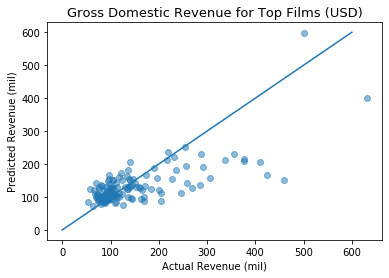

In [370]:
plt.scatter(y_test, test_set_pred, alpha=.5)
plt.plot(np.linspace(0,600,100), np.linspace(0,600,100))
plt.xlabel("Actual Revenue (mil)")
plt.ylabel("Predicted Revenue (mil)")
plt.title("Gross Domestic Revenue for Top Films (USD)", fontsize=13)

plt.savefig('Gross_Rev.png')